# Breast Cancer classification
My goal for this project is to use KNN to classify cancer diagnoses. There are two types of diagnoses; Benign(B) and Malignant(M).

I used a dataset obtained from Kaggle, which can be found at https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset.

The data contained the following features:
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

## Data Collection

import opendatasets as od
od.download('https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset')

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('breast-cancer-dataset/data.csv')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
df.shape

(569, 32)

## Data Preprocesssing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.duplicated().sum()

0

The dataset is clean further cleaning is not required

## Data Exploration

In [23]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

There are 357 tumors diagnosed as benign and 212 tumors diagnosed as malignant

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

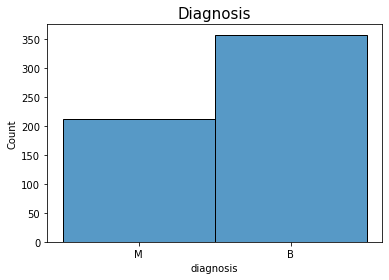

In [29]:
sns.histplot(x = 'diagnosis', data = df)
plt.title('Diagnosis', fontsize = 15);

There are more benign tumors than malignant ones

In [110]:
def plot_scatter(df, x, y):
    plt.figure(figsize = (8,8))
    sns.set_theme(palette = 'prism', style = 'dark')
    sns.scatterplot(x = x, y = y, hue = 'diagnosis', data = df)
    plt.title('Scatterplot of {} vs {} for each type of patient'.format(y, x), fontsize = 20)
    plt.xlabel('{}'.format(x),fontsize = 15)
    plt.ylabel('{}'.format(y),fontsize = 15)

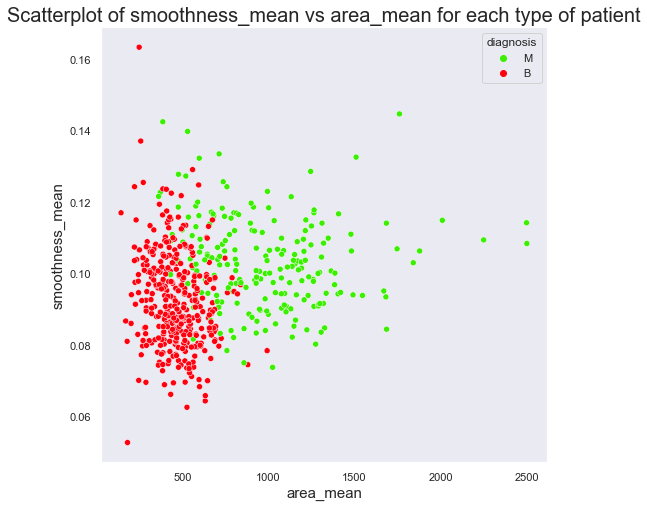

In [111]:
plot_scatter(df, 'area_mean', 'smoothness_mean')

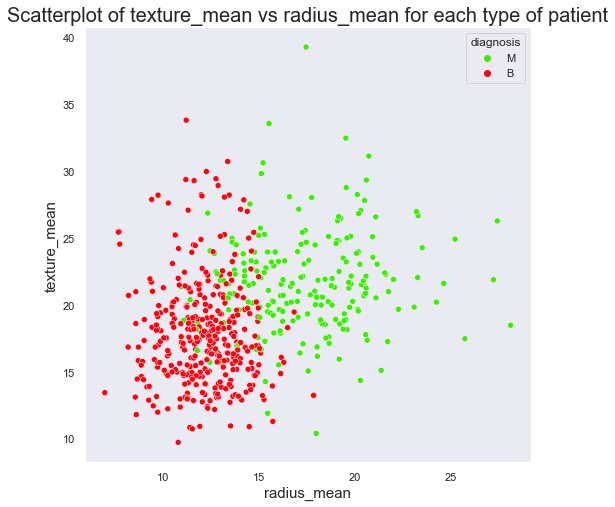

In [112]:
plot_scatter(df, 'radius_mean', 'texture_mean')

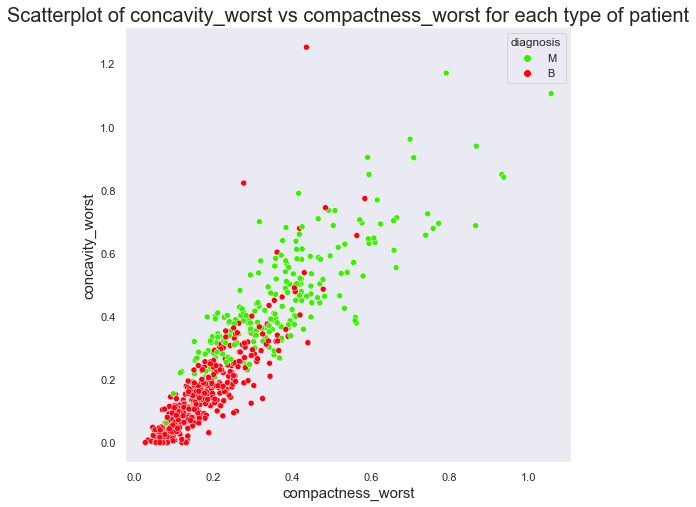

In [115]:
plot_scatter(df, 'compactness_worst', 'concavity_worst')

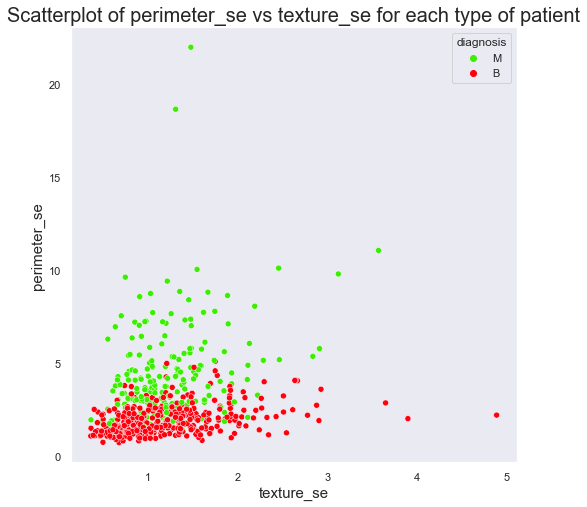

In [116]:
plot_scatter(df,'texture_se', 'perimeter_se')

## Preparation for Model Development

In [117]:
#view the first five rows of the diagnosis feature
df['diagnosis'].head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [119]:
#encoding the labels with LabelEncoder from sci-kit learn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [121]:
#check the result of the encoding
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [131]:
df['diagnosis'].unique()

array([1, 0])

In [132]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

This means the value 1 represents a malignant tumor while 0 represents a benign tumor

## Feature Selection

In [130]:
#selecting the features and label for the model
features = df.drop(['id', 'diagnosis'], axis = 1)
label = df['diagnosis']
print('Feature shape: {}\nLabel shape: {}'.format(features.shape, label.shape))

Feature shape: (569, 30)
Label shape: (569,)


## Model Development

#### Firstly, the data needs to be split into train, test and validation partitions

In [133]:
from sklearn.model_selection import train_test_split

In [136]:
#train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 42)

In [137]:
#validation sets
x_valid, x_val, y_value, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

#### Standardize the Variables

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()

In [140]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.fit_transform(x_valid)

#### Create and train a KNN model
 - n_neighbours of 1 is chosen

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
# Create a KNN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [195]:
# Train the classifier on the training set
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

### Evaluating the model

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [197]:
pred = knn.predict(x_test_scaled)

In [198]:
accuracy_score(y_test, pred)

0.9532163742690059

In [199]:
confusion_matrix(y_test, pred)

array([[105,   3],
       [  5,  58]], dtype=int64)

## Hyperparameter tuning with GridSearchCV

In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
# Define the k-NN model and the hyperparameters to tune
model = KNeighborsClassifier()
params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

In [202]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(model, params, cv=5)

In [203]:
# Fit the GridSearchCV object on the scaled validation data
grid_search.fit(x_val_scaled, y_value)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [204]:
#print the best hyperparameters found and performance
print('Best Hyperparameters: ', grid_search.best_params_)
print('Validation accuracy: ', grid_search.best_score_)

Best Hyperparameters:  {'n_neighbors': 5, 'weights': 'uniform'}
Validation accuracy:  0.9687003968253969


In [205]:
#train the final k-NN model on the combined training and validation sets with the best value of C
n_neighbors = grid_search.best_params_['n_neighbors']
weights = grid_search.best_params_['weights']
k_nn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)

In [206]:
k_nn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

### Evaluate the model

In [207]:
y_pred = k_nn.predict(x_test_scaled)

In [208]:
accuracy_score(y_test, y_pred)

0.9590643274853801

In [209]:
confusion_matrix(y_test, y_pred)

array([[105,   3],
       [  4,  59]], dtype=int64)

### Cross validation

In [210]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(k_nn, x_train_scaled, y_train,cv = 5)
print('Scores: {}'.format(scores))

Scores: [0.95       0.9625     0.975      0.94936709 0.93670886]


## Conclusion

While the model initially had a high accuracy, its accuracy was further improved through tuning.